<a href="https://colab.research.google.com/github/pratichha/SemiarProjects/blob/main/SeminarProjectPhishingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seminar Project On Phishing Detection using python and machine learning**.

First get important libaries and data from public repo .

In below code section import necessary libaries to analysis data.

In [1]:
#importing important libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#upload datasets that is for this seminar I had obtain data from public repo.
good_data = pd.read_csv("https://raw.githubusercontent.com/pratichha/SemiarProjects/main/Phis_data.csv")
phish_data = pd.read_csv("https://raw.githubusercontent.com/pratichha/SemiarProjects/main/good_data.csv")
#concatenat datasets so machine will learn about data and do research
df_concat = pd.concat([good_data, phish_data],ignore_index=True)

In [3]:
df_concat.head()

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
0,0,False,0,0,none,0,False,True,False,False,False,0,True,2
1,1,False,0,0,none,0,False,True,False,False,False,0,True,2
2,2,False,0,0,none,0,False,True,False,False,True,0,True,29
3,3,False,0,0,none,0,False,True,False,False,False,0,True,2
4,4,False,0,0,7bit,0,False,True,False,False,False,0,True,20


# Datasets description
**@ in URL:** Detects the presenc of the "@" character in URLs.

**Number of Attachments:** Detects the number of attachments present in the email. 

**Css in header:** Detects the number of Css links in the emails’ body, under the head tag in the html message.

**External Resources:** Detects the number of external resources linked in the body of the email. 

**Flash content:** Detects the presence of flash content in the body of the email. 

**HTML content:** Detects the presence of HTML content. 

**Html Form:** Detects the presence of HTML Forms. 

**Html iFrame:** Detects the presence of HTML iFrames.

**IPs in URLs:** Detects the presence of IPs in URLS, instead of human readable domain names. 

**Javascript blocks:** Detects the number of Javascript blocks inside the email’s body.

**URLs:** Detects the number of URLS in the email.

In [4]:
df_concat.shape

(4534, 14)

In [5]:
df_concat.isnull().sum()

Unnamed: 0            0
@ in URLs             0
Attachments           0
Css                   0
Encoding              0
External Resources    0
Flash content         0
HTML content          0
Html Form             0
Html iFrame           0
IPs in URLs           0
Javascript            0
Phishy                0
URLs                  0
dtype: int64

**Perform necessary EDA and data preprocessing on given datasets**


In [6]:
df_concat.drop(['Unnamed: 0'], axis=1,inplace = True)

In [7]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   @ in URLs           4534 non-null   bool  
 1   Attachments         4534 non-null   int64 
 2   Css                 4534 non-null   int64 
 3   Encoding            4534 non-null   object
 4   External Resources  4534 non-null   int64 
 5   Flash content       4534 non-null   bool  
 6   HTML content        4534 non-null   bool  
 7   Html Form           4534 non-null   bool  
 8   Html iFrame         4534 non-null   bool  
 9   IPs in URLs         4534 non-null   bool  
 10  Javascript          4534 non-null   int64 
 11  Phishy              4534 non-null   bool  
 12  URLs                4534 non-null   int64 
dtypes: bool(7), int64(5), object(1)
memory usage: 243.7+ KB


In [8]:
df_concat['Phishy'].value_counts()

True     2278
False    2256
Name: Phishy, dtype: int64

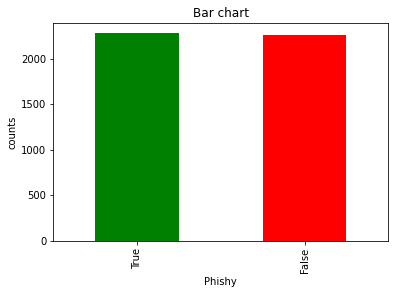

In [9]:
count=df_concat.value_counts(df_concat["Phishy"], sort= True)
count.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.xlabel('Phishy')
plt.ylabel('counts')
plt.show()

In [10]:
#preprocessing datasets
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_concat.Encoding)
df_concat.Encoding = le.transform(df_concat.Encoding)

df_concat = df_concat.astype(int)

df_concat.head()

feature_cols = ["@ in URLs", "Attachments", "Css", "Encoding", "External Resources", "Flash content", "HTML content",
                "Html Form", "Html iFrame", "IPs in URLs", "Javascript", "URLs"]
X = df_concat[feature_cols]  # Features
y = df_concat.Phishy  # Target variable

In [11]:
#for plotting histogram
#df_concat.hist(bins=70,figsize=(30,10))
#plt.show()

In [12]:
df_concat.describe()

,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
count,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000
mean,0.000221,0.030216,0.018747,1.290031,0.011689,0.001544,0.485002,0.029996,0.000662,0.063520,0.018527,0.502426,3.734671
std,0.014851,0.171200,0.257003,2.243092,0.220492,0.039266,0.499830,0.170594,0.025717,0.243923,0.322152,0.500049,10.728565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,7.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,122.000000


In [13]:
#looking for correlations
corr_matrix = df_concat.corr()
corr_matrix['Phishy'].sort_values(ascending=False)

Phishy                1.000000
HTML content          0.673593
Encoding              0.410920
IPs in URLs           0.257370
URLs                  0.236831
Attachments           0.175661
Html Form             0.172413
Css                   0.072601
Javascript            0.057237
External Resources    0.052764
Html iFrame           0.025607
Flash content         0.016662
@ in URLs             0.014781
Name: Phishy, dtype: float64

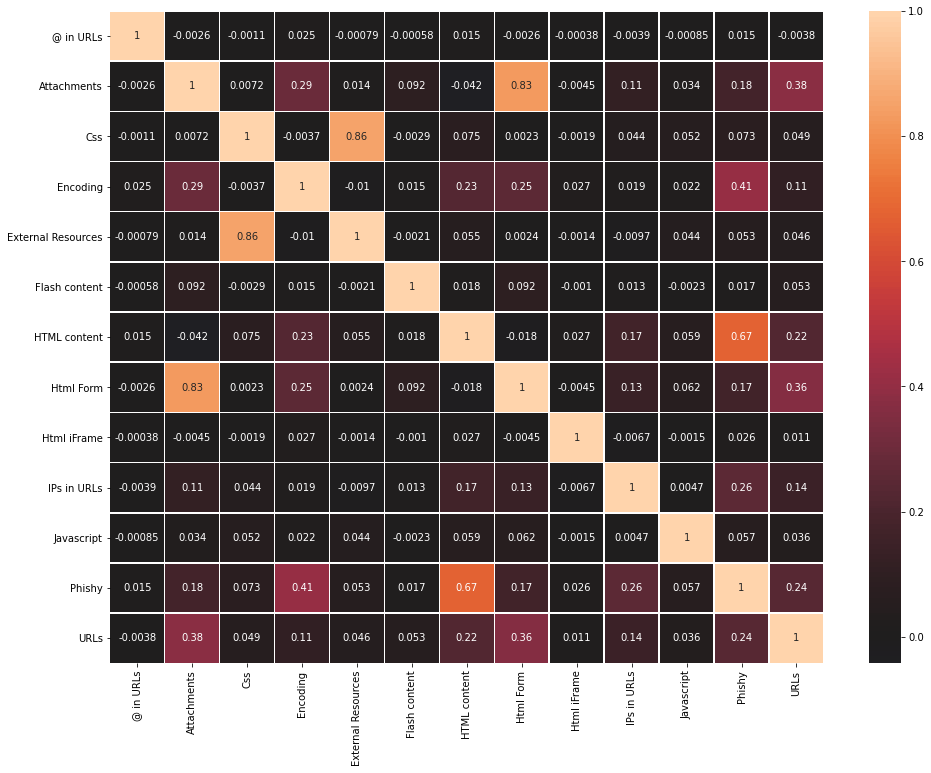

In [14]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(df_concat.corr(),annot=True,fmt='.2g',linewidths=.5,center=0)
plt.show()

**Split the datasets in train and test so we can train our datasets and test with test datasets.**


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42) # here 20% of datasets is for test #ramdom state keep our test dataset on similar format for whole processing
print(f"Rows in train set: {len(trainX)}\nRows in test set: {len(testX)}\n")
print(f"Rows in train set: {len(trainY)}\nRows in test set: {len(testY)}\n")


Rows in train set: 3627
Rows in test set: 907

Rows in train set: 3627
Rows in test set: 907



**Now use logistic regression and support vector classification to train our datasets and check accuracy with testdatasets**


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
models = [
          LogisticRegression(),
          SVC()
]

In [17]:
model_names = ['LogisticRegression',
                'SVC',
]
acc = []
eval_acc={}
for model in range(len(models)):
  classification_model = models[model]
  classification_model.fit(trainX,trainY)
  pred = classification_model.predict(testX)
  acc.append(accuracy_score(pred,testY))

eval_acc = {'Modelling Algoritms': model_names , 'Accuracy': acc}
eval_acc

{'Accuracy': [0.8478500551267916, 0.8809261300992283],
 'Modelling Algoritms': ['LogisticRegression', 'SVC']}

In [18]:
acc_table=pd.DataFrame(eval_acc)
acc_table=acc_table.sort_values(by='Accuracy',ascending = [False])
acc_table

,Modelling Algoritms,Accuracy
1,SVC,0.880926
0,LogisticRegression,0.847850


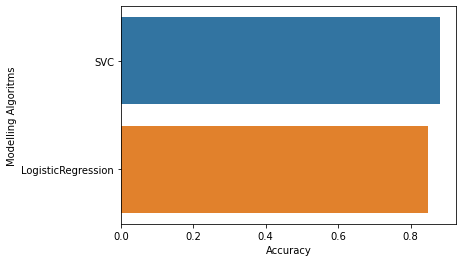

In [20]:
sns.barplot(y='Modelling Algoritms',x='Accuracy',data= acc_table)
plt.show()

Going through this analysis can say that SVM algorithm is better in comparision to Logistic Regression.
